### Lecture 4 - Feature Engineering

Feature engineering is one of the most important activities in Data Science and involves:

- Handling Missing Data
- Handling Outliers
- Transforming Data
- Scaling Data
- Encoding Data
- Augmenting Data

We will look at each of these below

In [1]:
# import common libraries
import pandas as pd
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import seaborn as sns

### Missing Data

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,0.0,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [4]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


You can see that there are 768 total records in the dataset

Pregnancies, Glucose, Insulin, and Outcome all have some missing data

Let's look at Pregnancies first

In [5]:
df['Pregnancies'].isnull().sum()

111

There are 111 mising values in Pregnancies

In [6]:
# what are the unique values in Pregnancies?
df['Pregnancies'].unique()

array([ 6.,  1.,  8., nan,  5.,  3., 10.,  2.,  4.,  7.,  9., 11., 13.,
       15., 17., 12., 14.])

They are all numeric values and look like the number of times a patient was pregnant

Do you notice anything about these values?

Since these are the number of times a person was pregnant, there is no value for 0 times!

It looks like that the 0 values are left blank so it's reasonable replace these with 0.

In [7]:
# replace missing Pregnancies with 0
df['Pregnancies'] = df['Pregnancies'].fillna(0)

In [8]:
# now look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


You can see that there are no more missing Pregnancies

Let's look at outcome next because it's a binary value indicating whether a patient has diabetes

In [9]:
df['Outcome'].unique()

array([ 1., nan])

It looks like Outcome is also missing a value for 0, so replace it

In [10]:
# replace missing Outcomes with 0
df['Outcome'] = df['Outcome'].fillna(0)

In [11]:
# now look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [12]:
df['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

We don't see any values for 0 in the data so you could replace all the values with 0.

But more than half of the dataset are missing insulin. 

If you replace them with 0, you run the risk of skewing the data and introducing bias into the dataset

You also shouldn't drop them because they are more than half the dataset.

A better way is to replace them with the mean or median of the data.  

This will fill in the data and also prevent bias since there will be an even number of values above and below.

In [13]:
df['Insulin'].fillna(value=df['Insulin'].mean(), inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


The last column mising data is Glucose

Let's look at the unique values

In [15]:
df['Glucose'].unique()

array([148.,  85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110.,
       168., 139., 189., 166., 100., 118., 107., 103., 126.,  99., 196.,
       119., 143., 147.,  97., 145., 117., 109., 158.,  88.,  92., 122.,
       138., 102.,  90., 111., 180., 133., 106., 171., 159., 146.,  71.,
       105., 101., 176., 150.,  73., 187.,  84.,  44., 141., 114.,  95.,
       129.,  79.,  nan,  62., 131., 112., 113.,  74.,  83., 136.,  80.,
       123.,  81., 134., 142., 144.,  93., 163., 151.,  96., 155.,  76.,
       160., 124., 162., 132., 120., 173., 170., 128., 108., 154.,  57.,
       156., 153., 188., 152., 104.,  87.,  75., 179., 130., 194., 181.,
       135., 184., 140., 177., 164.,  91., 165.,  86., 193., 191., 161.,
       167.,  77., 182., 157., 178.,  61.,  98., 127.,  82.,  72., 172.,
        94., 175., 195.,  68., 186., 198., 121.,  67., 174., 199.,  56.,
       169., 149.,  65., 190.])

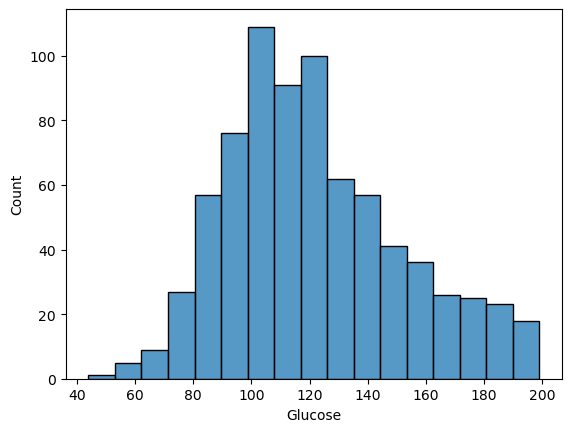

In [16]:
# the distribution also appears to be nearly normal
sns.histplot(df['Glucose'])
plt.show()

Since there are so few rows missing, let's simply drop the remaining missing rows and check the effect

In [17]:
df.dropna(inplace=True)

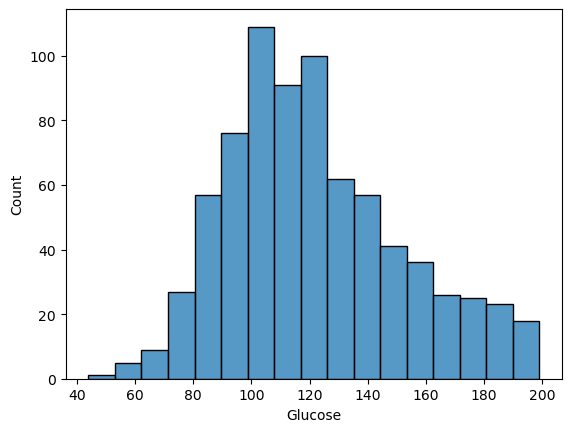

In [18]:
# No visible difference in the distribution!
sns.histplot(df['Glucose'])
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             763 non-null    float64
 4   Insulin                   763 non-null    float64
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.6 KB


Now we have a clean set of data with no missing values ready for model training

### Handling Outliers

In [20]:
# load the cars dataset
df = pd.read_csv('cars.csv')

In [21]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         2499 non-null   int64 
 1   brand         2499 non-null   object
 2   model         2499 non-null   object
 3   year          2499 non-null   int64 
 4   title_status  2499 non-null   object
 5   mileage       2499 non-null   int64 
 6   color         2499 non-null   object
 7   vin           2499 non-null   object
 8   lot           2499 non-null   int64 
 9   state         2499 non-null   object
 10  country       2499 non-null   object
 11  condition     2499 non-null   object
 12  age           2499 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


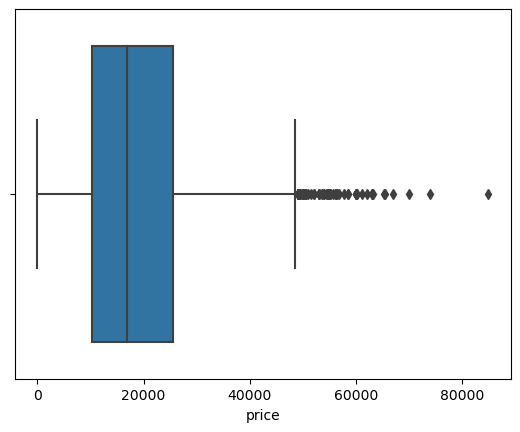

In [22]:
# let's check for price outliers using boxplot
sns.boxplot(data=df, x='price')
plt.show()

In [23]:
# price has significant outliers so let's handle them

# let's look at the outliers
df[(df['price'] > 50000)]

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age
44,55000,ford,srw,2017,clean vehicle,15273,black,1ft7w3bt5hee88155,167754310,pennsylvania,usa,3 days left,5
49,54000,ford,srw,2017,clean vehicle,26241,black,1ft7w3bt0hef02785,167754311,pennsylvania,usa,3 days left,5
95,53500,bmw,m,2017,clean vehicle,29355,blue,5ymkt6c37h0x20696,167765095,michigan,usa,2 days left,5
127,53000,chevrolet,3500,2018,clean vehicle,16105,black,1gc4k1ey0jf149152,167765123,washington,usa,21 hours left,4
277,67000,dodge,challenger,2019,clean vehicle,10944,blue,2c3cdzl97kh518237,167759490,ohio,usa,21 hours left,3
361,50412,ford,door,2017,clean vehicle,47129,black,1ft7w2bt3hef41039,167765418,michigan,usa,2 days left,5
380,54680,harley-davidson,road/street,2016,clean vehicle,9502,black,1hd1krm1xgb609213,167703374,virginia,usa,18 hours left,6
393,53500,ford,door,2017,clean vehicle,55732,white,1ft8w4dtxhed96692,167765452,michigan,usa,20 hours left,5
399,61200,bmw,series,2020,clean vehicle,7509,black,wba7t2c04lgl17687,167417053,california,usa,7 days left,2
403,51502,ford,door,2017,clean vehicle,27661,black,1ft8w3dt8hec12120,167765457,michigan,usa,2 days left,5


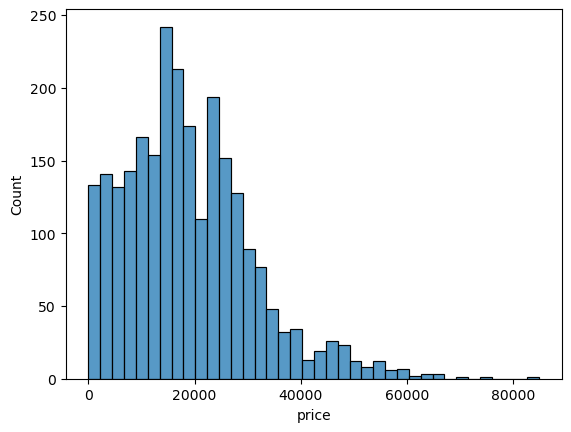

In [24]:
# in this case the outliers look correct!  so can't drop them or change them.

# all we can do now is move on to transformation since the data appears to be skewed

sns.histplot(df['price'])
plt.show()

### Log Transformation

In [25]:
# one thing to know is that log transformation does not work for 0
# so you have to handle 0 values first

# what are the 0 values in price?
df[(df['price'] == 0)].head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age
141,0,dodge,van,2008,salvage insurance,177948,orange,2d8hn44h88r669549,167756157,utah,usa,2 days left,14
144,0,dodge,door,2014,salvage insurance,123660,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left,8
196,0,ford,mpv,2017,clean vehicle,76858,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left,5
285,0,ford,door,2000,salvage insurance,124969,black,1fafp34p7yw270338,167251902,oklahoma,usa,17 hours left,22
290,0,mazda,door,2009,salvage insurance,117541,gray,jm3er293590215768,167543177,indiana,usa,16 hours left,13


In [26]:
# it looks like the title_status for all of these are salvage
# so we can just drop them since we're not interested in cars that are no longer usable

df = df[(df['price'] > 0)]

In [27]:
# now the minimum price is 0 so log transformation will work

# create new column with log transform
df['log_price'] = np.log(df['price'])

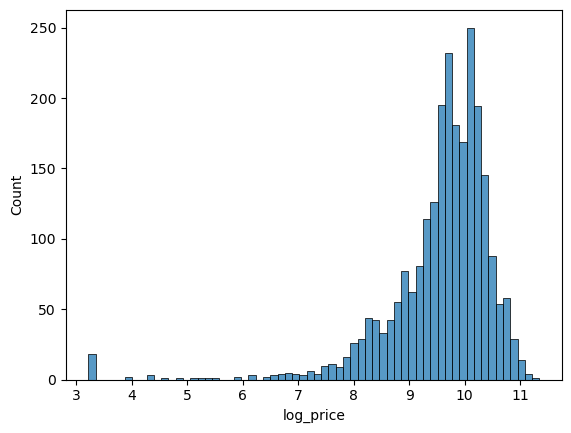

In [28]:
# now the distribution is much closer to normal for the logarithm of price and can be used in the model
sns.histplot(df['log_price'])
plt.show()

### Scaling Data

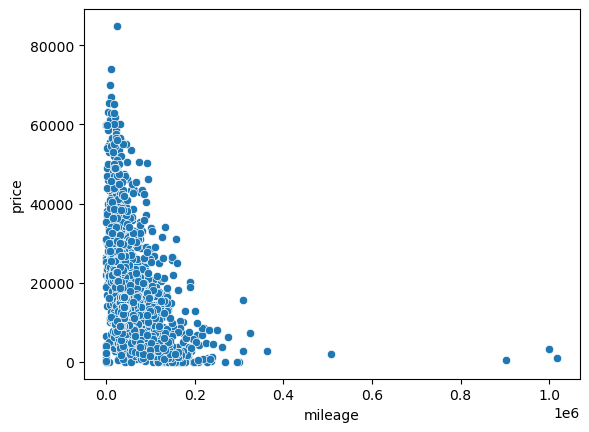

In [29]:
# assume we want to build a simple model to predict price from mileage and age
features = ['mileage','age']
target = ['price']

# let's view the data
sns.scatterplot(data=df, x=features[0], y=target[0])
plt.show()

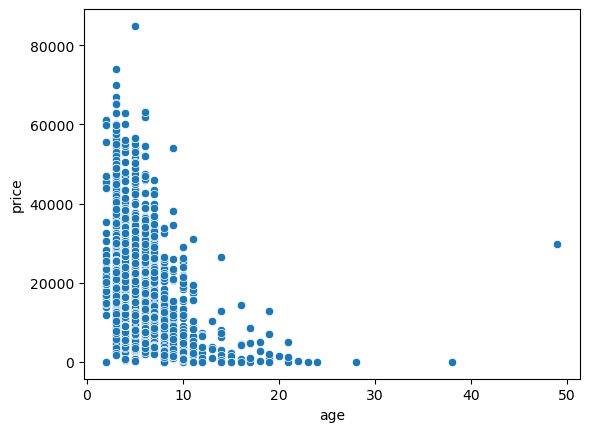

In [30]:
sns.scatterplot(data=df, x=features[1], y=target[0])
plt.show()

In [31]:
# what are the maximum values for each feature?
df[features].max()

mileage    1017936
age             49
dtype: int64

you can see how large the difference is between mileage and age so they need to scaled before modeling

from the plot, it looks like there are significant outliers so we need to use z-normalization

to use min-max scaling we need to remove outliers before scaling

but we already decided we can't change the outliers since they look correct

so we have to use z-normalization instead

In [32]:
# use StandardScaler from sklearn for z-normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# assign features to X variable
X = df[features].values

# what do the features look like before scaling?
X

array([[274117,     14],
       [190552,     11],
       [ 39590,      4],
       ...,
       [ 31594,      4],
       [ 32557,      4],
       [ 31371,      4]], dtype=int64)

In [33]:
# apply normalization
scaler.fit(X)

# replace X values with scaled X values
X = scaler.transform(X)

# what do they look like now?
X

array([[ 4.10316624,  3.02046178],
       [ 2.5724852 ,  2.00588405],
       [-0.19272358, -0.36146397],
       ...,
       [-0.33918832, -0.36146397],
       [-0.3215488 , -0.36146397],
       [-0.34327306, -0.36146397]])

### Encoding

In [34]:
# assume we want to add the brand of car to our features
features = ['mileage','age','brand']
target = ['price']

In [35]:
# brand is categorical so we will need to encode it before we can use in a model
df['brand'].unique() 

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'heartland', 'jaguar', 'acura', 'honda',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram', 'mazda'], dtype=object)

In [36]:
# assign our feature values to X
X = df[features].values

# what do they look like?
X

# we can see that the first two features are numerical but the third one is categorical

array([[274117, 14, 'toyota'],
       [190552, 11, 'ford'],
       [39590, 4, 'dodge'],
       ...,
       [31594, 4, 'nissan'],
       [32557, 4, 'nissan'],
       [31371, 4, 'nissan']], dtype=object)

In [37]:
# we can use the OneHotEncoder from sklearn to encode it
from sklearn.preprocessing import OneHotEncoder

# let's encode it
enc = OneHotEncoder(handle_unknown='ignore')

# create new dataframe with encoded values
enc_df = pd.DataFrame(enc.fit_transform(df[['brand']]).toarray())

In [38]:
# all the brands are now encoded columns
enc_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
# to train a model, now just combine your encoded data with the numerical data for a new training dataset
train_df = df[features].join(enc_df)

train_df

,mileage,age,brand,0,1,2,3,4,5,6,...,18,19,20,21,22,23,24,25,26,27
0,274117,14,toyota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,190552,11,ford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39590,4,dodge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64146,8,ford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6654,4,chevrolet,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,23609,3,nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2495,34553,4,nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,31594,4,nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,32557,4,nissan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### New Features

One of the most powerful techniques is creating new feature from existing features

In [40]:
# what if you wanted to add condition to your model to predict when a car will sell?  how could you do that?
features = ['mileage','age','condition']
target = ['price']

df[features].head()

,mileage,age,condition
0,274117,14,10 days left
1,190552,11,6 days left
2,39590,4,2 days left
3,64146,8,22 hours left
4,6654,4,22 hours left


In [41]:
# let's look at condition.  what type of variable is it?
df['condition'].unique()

# it's a text string that shows how much time is left in an advertising campaign

# not very useful in it's current form so let's think about a new feature

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '7 days left', '8 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

In [42]:
# let's create a new feature called advertising to indicate if a car is currently being advertised

# first set all values = 0 indicating that there is no advertising
df['advertising'] = 0

# now set advertising column to 1 for all cars that are not 'listing expired'
df.loc[df['condition'] != 'Listing Expired', 'advertising'] = 1

In [43]:
# let's look at our features now
features = ['mileage','age','advertising']
target = ['price']

df[features].head()

,mileage,age,advertising
0,274117,14,1
1,190552,11,1
2,39590,4,1
3,64146,8,1
4,6654,4,1


This is a set of features we can train a model on now!